# Mhealth task for apply Activity Detection Using Sensory Data project 

Student：YunTzu


In [ ]:
#import package

import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

In [44]:

#Import data.
#read the file
#combined the file and rename the dataframe
alldata=pd.DataFrame()
for num in range(1,11):
    data = pd.read_csv(f'dataset/mHealth_subject{num}.log', header=None, sep='\t')
    alldata = pd.concat([alldata, data])
    
df = alldata.rename(columns={0: "acs_xaxis", 1: "acs_yaxis",2: "acs_zaxis",3: "es_lead1 ",4: "es_lead2",5: "al_as_xaxis",6: "al_as_yaxis",7: "al_as_zaxis",8: "gl_as_xaxis",9: "gl_as_yaxis",10: "gl_as_zaxis",11: "ml_as_xaxis",12: "ml_as_yaxis"
                       ,13:"ml_as_zaxis",14: "ar_l_as_xaxis",15: "ar_l_as_yaxis",16: "ar_l_as_zaxis",17:"gr_l_as_x_axix",18: "gr_l_as_y_axix",19:"gr_l_as_z_axix",20: "mr_l_a_s_xaxis",21: "mr_l_a_s_yaxis",22: "mr_l_a_s_zaxis",23:"Label"})

df


,acs_xaxis,acs_yaxis,acs_zaxis,es_lead1,es_lead2,al_as_xaxis,al_as_yaxis,al_as_zaxis,gl_as_xaxis,gl_as_yaxis,...,ar_l_as_xaxis,ar_l_as_yaxis,ar_l_as_zaxis,gr_l_as_x_axix,gr_l_as_y_axix,gr_l_as_z_axix,mr_l_a_s_xaxis,mr_l_a_s_yaxis,mr_l_a_s_zaxis,Label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,-9.2476,-0.248070,-2.62230,0.230250,0.234430,1.7849,-9.8287,0.29725,-0.341370,-0.90056,...,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0
98300,-9.4632,-0.073513,-2.11190,0.276300,0.284670,1.8687,-9.8766,0.46236,-0.341370,-0.90056,...,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0
98301,-9.4011,-0.144580,-3.02350,0.288850,0.301410,1.6928,-9.9290,0.16631,-0.341370,-0.90056,...,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0
98302,-9.3732,-0.026252,-2.70760,0.351650,0.347460,1.5279,-9.6306,0.30458,-0.341370,-0.90056,...,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0


## EDA


In [48]:
#Check the datatype
#check if there is any missing data, we can see there is no missing data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215745 entries, 0 to 98303
Data columns (total 24 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   acs_xaxis       1215745 non-null  float64
 1   acs_yaxis       1215745 non-null  float64
 2   acs_zaxis       1215745 non-null  float64
 3   es_lead1        1215745 non-null  float64
 4   es_lead2        1215745 non-null  float64
 5   al_as_xaxis     1215745 non-null  float64
 6   al_as_yaxis     1215745 non-null  float64
 7   al_as_zaxis     1215745 non-null  float64
 8   gl_as_xaxis     1215745 non-null  float64
 9   gl_as_yaxis     1215745 non-null  float64
 10  gl_as_zaxis     1215745 non-null  float64
 11  ml_as_xaxis     1215745 non-null  float64
 12  ml_as_yaxis     1215745 non-null  float64
 13  ml_as_zaxis     1215745 non-null  float64
 14  ar_l_as_xaxis   1215745 non-null  float64
 15  ar_l_as_yaxis   1215745 non-null  float64
 16  ar_l_as_zaxis   1215745 non-null  floa


2) Activity set

The activity set is listed in the following:

L1: Standing still (1 min) 

L2: Sitting and relaxing (1 min) 

L3: Lying down (1 min) 

L4: Walking (1 min) 

L5: Climbing stairs (1 min) 

L6: Waist bends forward (20x) 

L7: Frontal elevation of arms (20x)

L8: Knees bending (crouching) (20x)

L9: Cycling (1 min)

L10: Jogging (1 min)

L11: Running (1 min)


L12: Jump front & back (20x)

In [51]:
#check what values in the the label
df['Label'].unique()


array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [53]:
#check the amount of each label
df['Label'].value_counts()

0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: Label, dtype: int64

In [140]:
#Label 0 is for the null class, so maybe we'll eliminate them here
#so here we have 24 variables and 343195 observations here.
new_df = df[df['Label'] != 0]
new_df['Label'].value_counts()
new_df.shape

(343195, 24)

We can see their are some variables are highly correlated just as : 
    
gyro from the right-lower-arm sensor (Z axis) & gyro from the left-ankle sensor (Y axis) the correlation is 0.6

magnetometer from the right-lower-arm sensor (Z axis)&magnetometer from the left-ankle sensor (X axis) the correlation is 0.49


<AxesSubplot:>

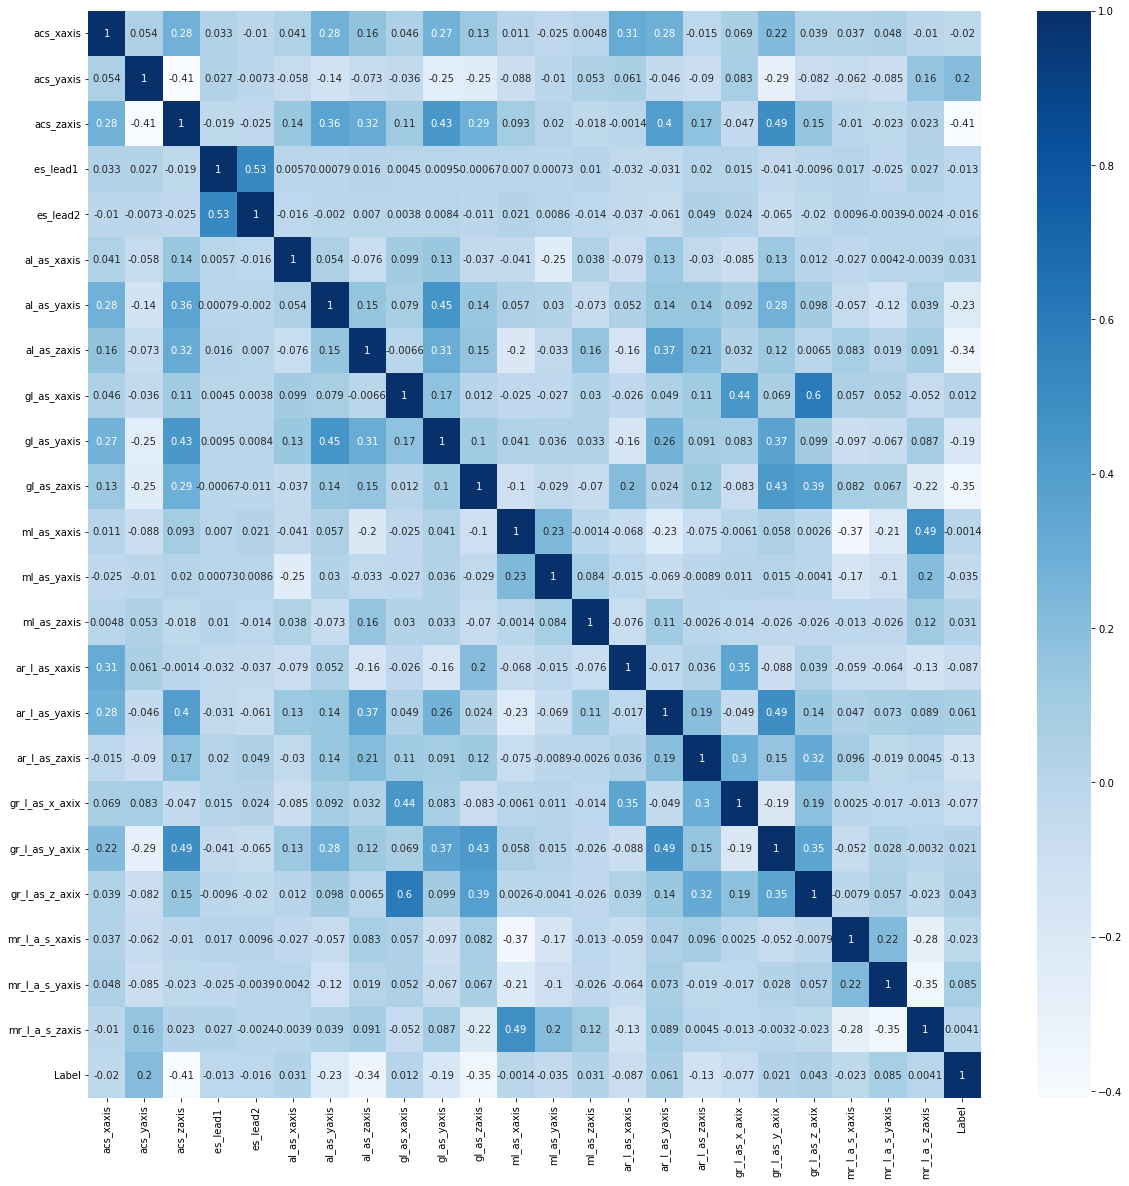

In [63]:
#Check the correlation amoung variables

import seaborn as sns
corr = new_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, cmap="Blues",annot = True)

<AxesSubplot:>

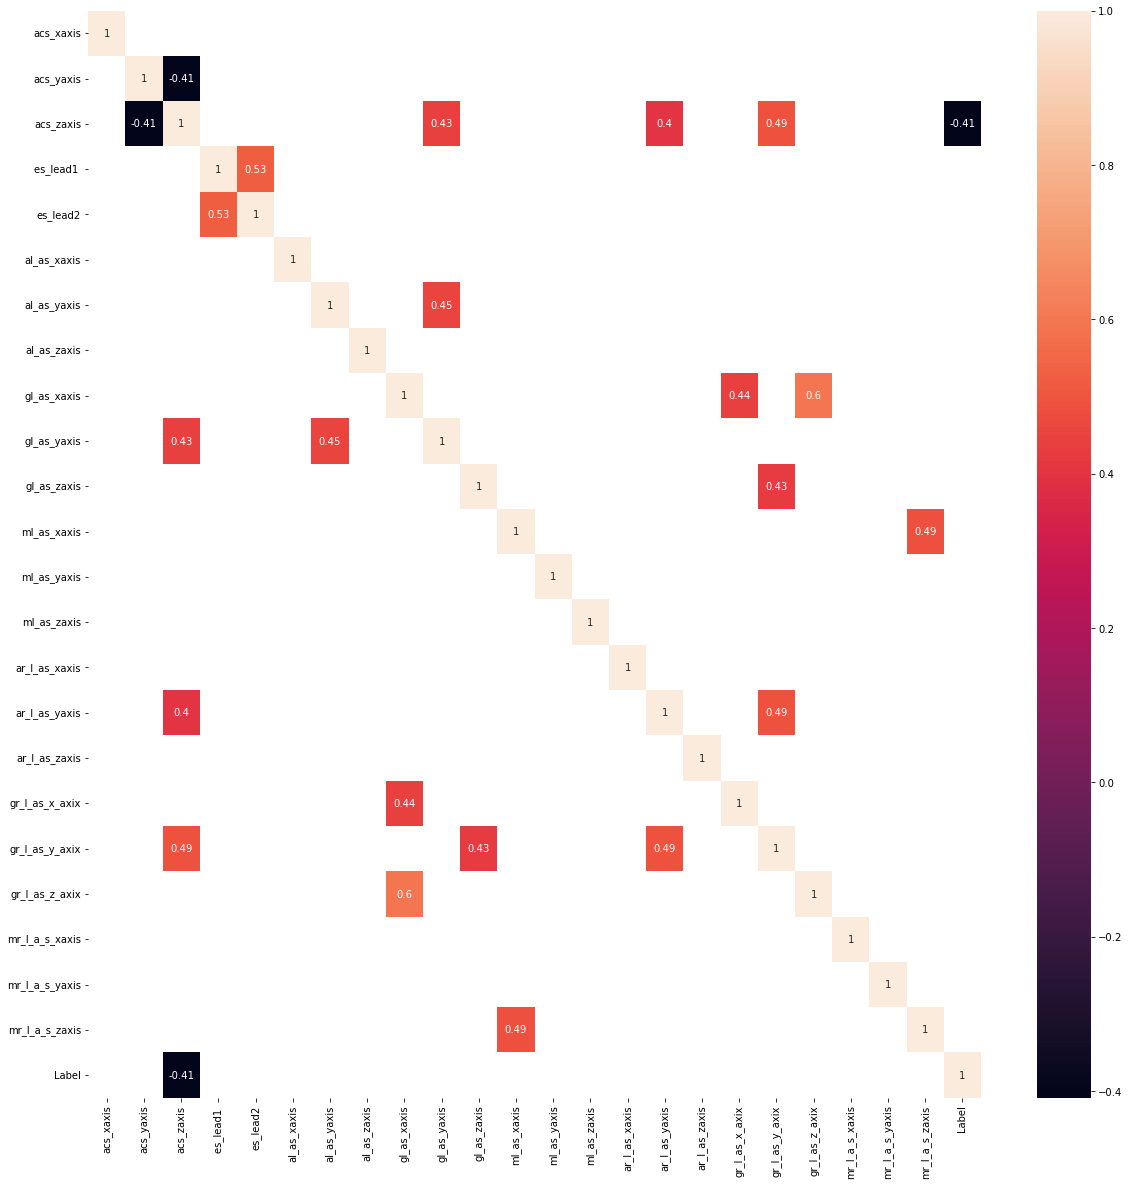

In [97]:
#check the correlation highter than 40%

high_cor = abs(new_df.corr())>0.4
heatmaps=new_df.corr()[high_cor]
plt.figure(figsize = (20,20))
sns.heatmap(heatmaps, annot=True)

## Preprosessing

In [161]:
#since we have 343195 observations which is a large dataset , so we sample 3000 observation from each variable.
#after the sampling we have 36000 observations
lst = []
for i in new_df["Label"].unique():
    #create the index for each label
    labels = new_df.query("Label==@i")
    #add sample of each label to the list
    lst.append(labels.sample(3000,random_state=1))
#apply frac = 100% to shuffle the data
new_df1=pd.concat(lst,axis=0).sample(frac=1.0,random_state=1)
new_df1



,acs_xaxis,acs_yaxis,acs_zaxis,es_lead1,es_lead2,al_as_xaxis,al_as_yaxis,al_as_zaxis,gl_as_xaxis,gl_as_yaxis,...,ar_l_as_xaxis,ar_l_as_yaxis,ar_l_as_zaxis,gr_l_as_x_axix,gr_l_as_y_axix,gr_l_as_z_axix,mr_l_a_s_xaxis,mr_l_a_s_yaxis,mr_l_a_s_zaxis,Label
37881,-9.36400,0.015992,-1.87220,-0.087912,-0.062794,0.82606,-9.8384,0.31842,0.58256,-0.803000,...,-7.15040,-2.7906,5.94380,-0.082353,-0.77823,0.538790,0.17944,-0.008978,-0.718340,2
118240,-7.59660,0.536450,-0.63593,-2.361100,0.627940,-0.38762,-9.0289,-2.89280,-0.59926,0.016886,...,-0.70214,-8.8897,1.03470,-0.515690,-0.24230,-0.286640,10.33100,-44.103000,46.496000,5
158552,-9.24830,0.796540,-2.03360,-0.016745,0.046049,3.61020,-8.9908,-2.04890,0.22263,-0.309570,...,-3.42260,-8.9858,-0.58471,0.192160,-0.88090,0.310340,-4.99610,-32.827000,15.391000,5
16540,-9.33220,0.445940,0.61908,-0.100470,0.008373,-2.09890,-4.3770,-3.04190,0.20594,0.181990,...,-3.64150,-8.3218,0.82350,0.821570,-1.55440,0.818970,-10.90000,-12.779000,17.960000,5
15025,-12.76800,2.532900,1.61740,-0.142330,-0.133960,2.54110,-7.9099,-5.83880,-0.37662,-0.894930,...,-5.55210,-7.8365,3.34780,0.388240,-0.83984,0.079741,-15.59300,-15.324000,12.838000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51516,-0.11322,-1.914700,9.54350,0.004186,0.058608,4.09700,1.2274,8.88360,0.47124,0.440900,...,-4.57660,-1.5460,8.40190,-0.100000,0.37782,0.795260,0.36444,0.537230,-0.359090,3
86702,12.87300,2.286600,-2.65740,-0.669810,0.008373,-6.69470,-19.1110,19.58200,-0.51577,-0.217640,...,-13.67800,-7.5553,2.46600,-0.690200,-0.71663,-0.390090,70.83200,27.563000,32.188000,12
14198,-9.36560,0.098271,2.01940,-0.058608,-0.104660,0.59712,-9.8326,0.89976,0.50464,-0.857410,...,-5.27750,-7.2832,3.67750,0.166670,-0.72074,0.403020,0.54399,0.539080,0.005489,2
25087,-6.45100,1.841700,-4.76060,0.079540,0.062794,1.25580,-9.6966,2.62150,-0.29499,-0.934330,...,-3.81040,-5.5048,0.51642,-0.378430,-0.77207,-0.601290,9.12120,14.450000,2.204000,6


train test split, I'll set 70% of the data to train set and the other 30% to the test set  by using train test function from sklearn .


In [171]:
#define the dependent variable and independent variable
y=new_df1["Label"]
x=new_df1.drop("Label",axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state =1 )


x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state =1)

In [172]:
#here we can see that the amount of each label are roughly equal

y_train.value_counts()

12    2119
4     2116
8     2115
9     2114
6     2105
1     2101
3     2096
11    2094
7     2092
5     2087
2     2084
10    2077
Name: Label, dtype: int64

Check the dependent variable to see whether we need to scale the datathe range of the means and the standard deviation is large, so maybe we need to scale dataset to improve the performance of our dataset

In [173]:

x_train.describe()

,acs_xaxis,acs_yaxis,acs_zaxis,es_lead1,es_lead2,al_as_xaxis,al_as_yaxis,al_as_zaxis,gl_as_xaxis,gl_as_yaxis,...,ml_as_zaxis,ar_l_as_xaxis,ar_l_as_yaxis,ar_l_as_zaxis,gr_l_as_x_axix,gr_l_as_y_axix,gr_l_as_z_axix,mr_l_a_s_xaxis,mr_l_a_s_yaxis,mr_l_a_s_zaxis
count,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,...,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000,25200.000000
mean,-7.414195,-0.118427,-1.028583,-0.010185,-0.020635,1.786459,-9.027653,-0.884313,0.092570,-0.558164,...,-0.529379,-3.510911,-5.727114,2.283040,-0.223378,-0.412646,0.368627,-0.459677,1.461915,-0.236580
std,6.115022,2.823846,4.690322,0.856692,0.877280,4.474580,5.380161,6.708572,0.462287,0.423104,...,19.671585,6.223304,6.641712,4.241983,0.543280,0.544132,0.522236,34.225972,31.844560,86.182986
min,-22.295000,-20.078000,-18.401000,-8.619600,-8.619600,-22.133000,-19.600000,-19.365000,-1.740300,-2.504700,...,-227.000000,-22.231000,-18.962000,-18.238000,-1.170600,-2.236100,-1.015100,-270.500000,-299.420000,-661.090000
25%,-9.714575,-1.275900,-3.751525,-0.226060,-0.184200,0.095865,-10.131000,-3.871850,-0.361780,-0.810510,...,-2.109875,-5.164750,-9.572125,0.023949,-0.694120,-0.831620,-0.060345,-7.187300,-8.185525,-14.124500
50%,-8.744400,-0.269175,-0.831990,-0.075353,-0.050235,1.360700,-9.593400,0.287375,0.187380,-0.688560,...,-0.303300,-2.481450,-7.634000,1.746450,-0.329410,-0.593430,0.435340,0.357220,0.352170,-0.705740
75%,-4.252375,1.006925,1.105525,0.171640,0.142330,2.956150,-7.383925,1.810850,0.486090,-0.493430,...,1.922700,-0.464012,-1.901275,5.201700,0.215690,-0.049281,0.836210,5.621250,9.265825,11.462000
max,19.082000,20.917000,26.196000,8.502400,8.514900,20.013000,21.040000,24.837000,1.705000,1.716700,...,269.300000,19.682000,21.888000,25.216000,1.317600,1.106800,1.506500,224.860000,333.010000,657.180000


Create the standard scalar and just fit the scalar to the train set.

Then transform both train and test using the fit that we just have in the train set .

In [174]:

from sklearn.preprocessing import StandardScaler
standard_scaler= StandardScaler()
standard_scaler.fit(x_train)
X_train = standard_scaler.transform(x_train)
# transform the train data and it return array datatype , so we'll need to turn it into dataFrame

X_train = pd.DataFrame((X_train), index = x_train.index,columns=x_train.columns)
X_train

X_test = standard_scaler.transform(x_test)
X_test = pd.DataFrame((X_test), index = x_test.index,columns=x_test.columns)

X_val = standard_scaler.transform(x_val)
X_val = pd.DataFrame((X_val), index = x_val.index,columns=x_val.columns)
X_val

,acs_xaxis,acs_yaxis,acs_zaxis,es_lead1,es_lead2,al_as_xaxis,al_as_yaxis,al_as_zaxis,gl_as_xaxis,gl_as_yaxis,...,ml_as_zaxis,ar_l_as_xaxis,ar_l_as_yaxis,ar_l_as_zaxis,gr_l_as_x_axix,gr_l_as_y_axix,gr_l_as_z_axix,mr_l_a_s_xaxis,mr_l_a_s_yaxis,mr_l_a_s_zaxis
129672,-0.640044,2.446438,-0.514456,0.099849,-0.100546,0.389841,0.081161,-1.298050,-1.440368,-0.414602,...,-0.816860,0.398255,-1.482612,-0.866673,-0.512789,1.569736,-0.718258,-1.078306,-0.680221,0.138842
63968,-0.236178,-0.140766,-0.791564,-1.463934,-0.740001,0.144383,0.095065,-0.774291,-0.974825,-0.951171,...,-0.521505,0.241968,-0.883206,-0.372814,-1.115528,-0.328483,0.086482,0.364779,1.069846,0.093570
95366,0.064497,0.749817,-1.039548,-0.139592,-0.143498,-0.164345,0.172462,-0.617966,0.421825,-0.733892,...,0.385024,0.835507,-0.249110,1.545596,2.035321,0.260229,0.746790,0.211790,-0.150657,-0.208925
14361,1.231311,-1.639241,1.964058,0.109622,-0.062374,0.707665,1.898467,1.432183,0.742888,3.696005,...,0.026449,-0.525517,0.842869,1.132573,-0.242094,1.826352,0.944885,0.024078,-0.029151,-0.005610
102324,0.746782,-0.328946,0.405682,-1.478525,-0.396409,-0.401301,1.511108,0.622010,0.076665,-0.804845,...,0.384358,-0.359316,0.872668,-0.095391,-0.436988,-0.132239,1.015046,0.108375,-1.681071,0.059809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,-0.364847,0.019877,-0.078145,-0.144483,-0.095781,-0.329389,-0.108484,0.316857,-0.533358,-0.365842,...,0.012041,0.139480,-0.532160,-0.573710,-1.151624,-0.419051,-0.375732,0.029112,-0.051886,-0.001297
112904,-0.840701,1.284595,0.257461,0.065642,-0.091005,-1.933060,1.118103,1.572723,-2.471826,-0.064303,...,0.390631,0.001593,-1.019017,-0.884401,-0.278191,-0.932282,-2.005852,-0.053327,-1.019344,0.018378
43615,-0.259318,1.113159,-0.723614,0.041209,0.438688,-0.913927,-0.285935,-0.635138,-0.380848,-0.645188,...,0.099022,0.469763,0.064339,1.351579,1.584163,0.403634,1.122337,0.095280,-0.269474,-0.012534
51348,1.232049,-0.646037,2.253511,-0.251992,-0.167356,0.518437,1.922686,1.455184,0.787039,2.405658,...,0.019385,-0.175150,0.644758,1.468225,0.237929,1.471614,0.816952,0.029271,-0.034791,-0.001359


After standardizing, we can see that the mean is close to zero and standard deviation is close to one

In [164]:

X_train.describe()

,acs_xaxis,acs_yaxis,acs_zaxis,es_lead1,es_lead2,al_as_xaxis,al_as_yaxis,al_as_zaxis,gl_as_xaxis,gl_as_yaxis,...,ml_as_zaxis,ar_l_as_xaxis,ar_l_as_yaxis,ar_l_as_zaxis,gr_l_as_x_axix,gr_l_as_y_axix,gr_l_as_z_axix,mr_l_a_s_xaxis,mr_l_a_s_yaxis,mr_l_a_s_zaxis
count,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,...,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04,2.520000e+04
mean,2.517607e-16,4.380975e-17,1.406282e-17,3.926973e-17,5.802237e-18,2.828770e-17,6.867743e-17,3.874546e-17,1.838917e-17,-9.870687e-17,...,-7.507222e-18,-6.851662e-17,-1.226620e-16,6.253816e-17,2.925350e-17,5.029927e-17,6.823466e-17,1.651787e-17,7.560090e-18,1.636698e-18
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-2.433532e+00,-7.068362e+00,-3.703959e+00,-1.004981e+01,-9.802038e+00,-5.345739e+00,-1.965101e+00,-2.754842e+00,-3.964869e+00,-4.600700e+00,...,-1.151280e+01,-3.008122e+00,-1.992731e+00,-4.837702e+00,-1.743559e+00,-3.351194e+00,-2.649673e+00,-7.890081e+00,-9.448643e+00,-7.668179e+00
25%,-3.761925e-01,-4.099005e-01,-5.805563e-01,-2.519921e-01,-1.864494e-01,-3.778293e-01,-2.050811e-01,-4.453401e-01,-9.828504e-01,-5.964286e-01,...,-8.034569e-02,-2.657547e-01,-5.789301e-01,-5.325660e-01,-8.664989e-01,-7.700023e-01,-8.214306e-01,-1.965687e-01,-3.029601e-01,-1.611478e-01
50%,-2.175350e-01,-5.338505e-02,4.191540e-02,-7.607117e-02,-3.374150e-02,-9.515242e-02,-1.051564e-01,1.746589e-01,2.050940e-01,-3.081959e-01,...,1.149291e-02,1.654235e-01,-2.871133e-01,-1.264977e-01,-1.951746e-01,-3.322502e-01,1.277474e-01,2.386824e-02,-3.484950e-02,-5.443876e-03
75%,5.170681e-01,3.985253e-01,4.550114e-01,2.122448e-01,1.857651e-01,2.614133e-01,3.055225e-01,4.017571e-01,8.512643e-01,1.530000e-01,...,1.246533e-01,4.896046e-01,5.760434e-01,6.880551e-01,8.081948e-01,6.678017e-01,8.953660e-01,1.776735e-01,2.450674e-01,1.357439e-01
max,4.333054e+00,7.449358e+00,5.804531e+00,9.936775e+00,9.729733e+00,4.073434e+00,5.588727e+00,3.834173e+00,3.488014e+00,5.376712e+00,...,1.371698e+01,3.726858e+00,4.157913e+00,5.406296e+00,2.836488e+00,2.792479e+00,2.178892e+00,6.583426e+00,1.041166e+01,7.628299e+00


## Model Building

## Logistic Regression



Create logistic regression model and fit the model to the train set.

C is the inverse of the regularization parameter  𝜆.

As C increases, the penalty decreases.

Create a loop and fit the models using each C value.
Make predictions
Calculate accuracy scores for training and testing datasets. Create a list of accuracy results for train and test accuracies. Show these lists.

Create the validation curve based on each C value and the corresponding train and test accuracies.

In [165]:


C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

accuracy_train= []
accuracy_test = []
for c in C_list:
    model = LogisticRegression(max_iter = 1000, solver='lbfgs',penalty='l2', C=c)
    model.fit(X_train,y_train)
    pred_train_c = model.predict(X_train)
    pred_test_c = model.predict(X_test)
    accuracy_train.append(metrics.accuracy_score( y_train,  pred_train_c))
    accuracy_test.append(metrics.accuracy_score( y_test, pred_test_c))


From the plot we can see the accuracy from penalty 0.001 to 10000 are rought the same , so I would use c=1 in our model.

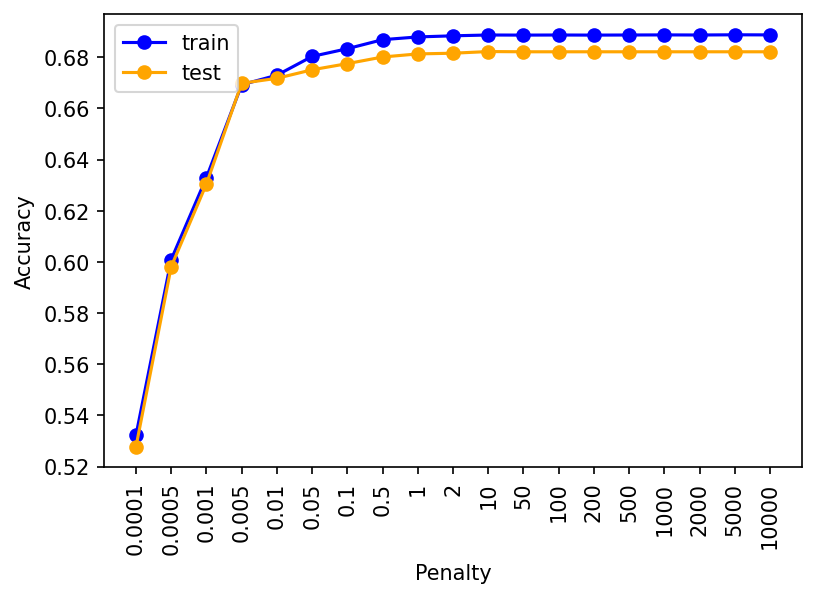

In [166]:


f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test, color='orange', marker='o', label = 'test')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list,rotation=90)
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Do the model again to check the confusion matrix.

Here we can see the variable Lable and classification of label.

From the confusion matrix we can see sevaral Labels perform pretty well, such as Label1,Label3 and Label9.

When we comes to Label1,Label3 and Label9 , the model did not do lots of the missclassification for them.

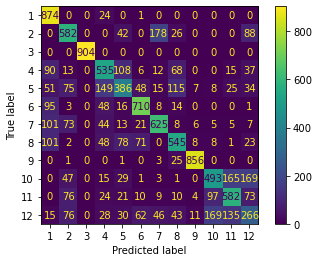

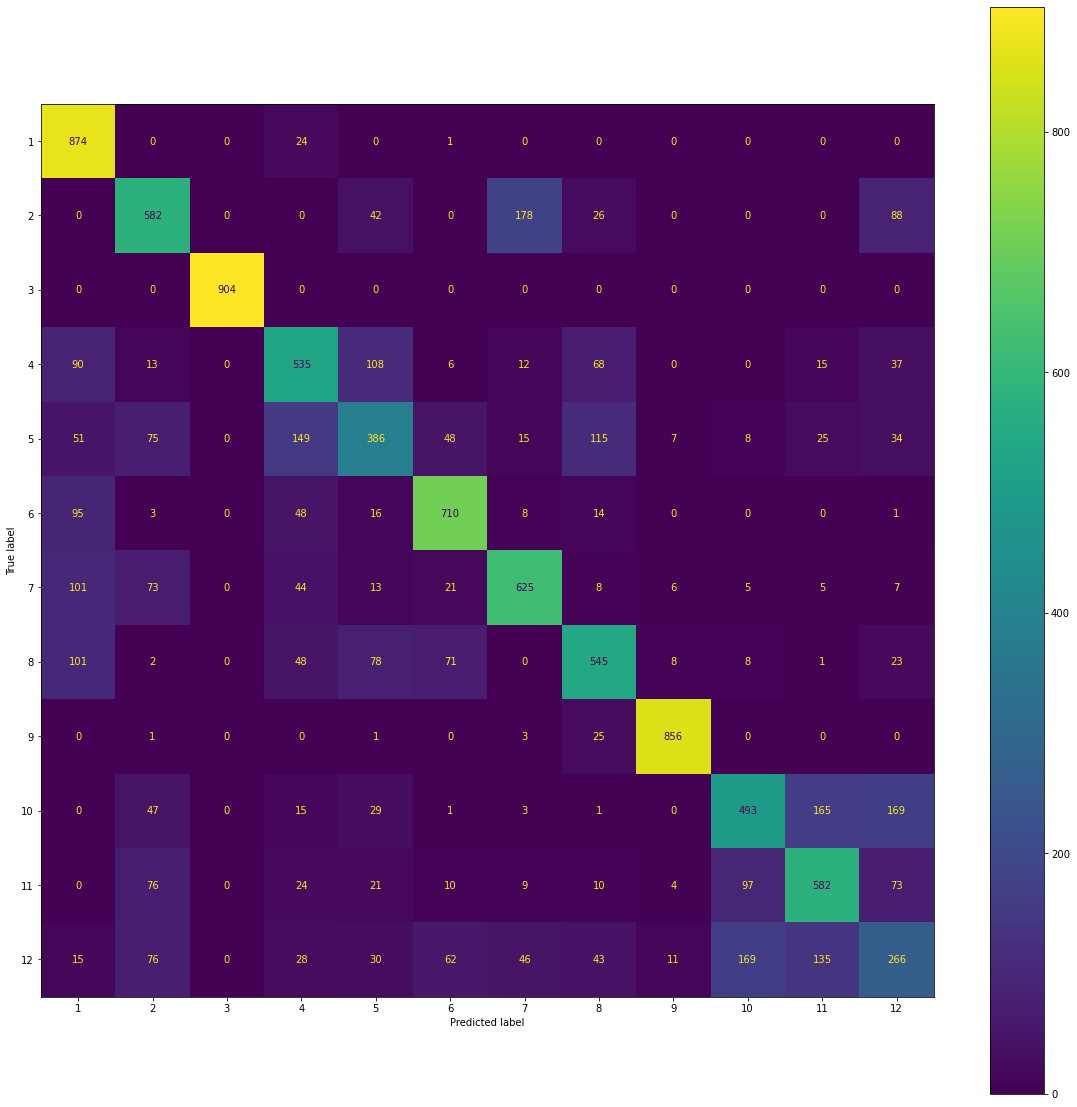

In [167]:

model = LogisticRegression(max_iter = 1000, solver='lbfgs',penalty='l2', C=1)
model.fit(X_train,y_train)
pred_train_c = model.predict(X_train)
pred_test_c = model.predict(X_test)
cmp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_test_c)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)


Here we got classification report to see how well is each classificaction doing.

Precision: When it predicts label, how often is it correct? (TP/predicted label)

Recall :True Positive Rate: When it's actually label num, how often does it predict label num ?

f1-score : Precision + Recall

Here we can see  we have Label 3 =1, that means the model perfectly classify label 3 , it is susicious that our model could classify perfectly so here maybe we need to back to EAD to check the detail of the data ,the f1-score of the Label9 perform pretty well here.

In [169]:

print(metrics.classification_report(y_test, pred_test_c))

              precision    recall  f1-score   support

           1       0.66      0.97      0.79       899
           2       0.61      0.64      0.62       916
           3       1.00      1.00      1.00       904
           4       0.58      0.61      0.59       884
           5       0.53      0.42      0.47       913
           6       0.76      0.79      0.78       895
           7       0.70      0.69      0.69       908
           8       0.64      0.62      0.63       885
           9       0.96      0.97      0.96       886
          10       0.63      0.53      0.58       923
          11       0.63      0.64      0.63       906
          12       0.38      0.30      0.34       881

    accuracy                           0.68     10800
   macro avg       0.67      0.68      0.67     10800
weighted avg       0.67      0.68      0.67     10800



## K Nearest Neighbors 
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,10,15,20]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores

In [153]:


from sklearn.neighbors import KNeighborsClassifier
accuracy_train_k= []
accuracy_test_k = []
K_list = [1,3,5,10,15,20]
for n in K_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
#Make predictions
    pred_train_k = knn.predict(X_train)
    pred_test_k = knn.predict(X_test)
    accuracy_train_k.append(metrics.accuracy_score( y_train,  pred_train_k))
    accuracy_test_k.append(metrics.accuracy_score( y_test,  pred_test_k))



Here we can see k =1 perform best

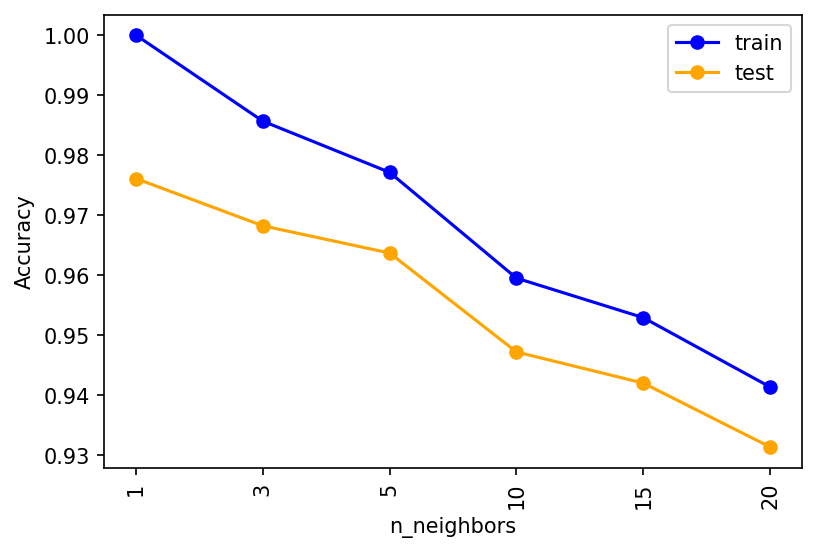

In [154]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train_k, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test_k, color='orange', marker='o', label = 'test')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list,rotation=90)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [155]:
#do the model again with k=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#Make predictions
pred_train_k = knn.predict(X_train)
pred_test_k = knn.predict(X_test)

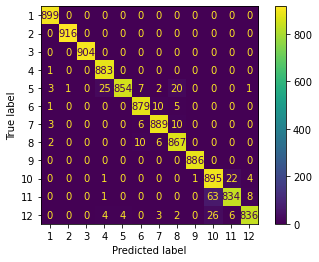

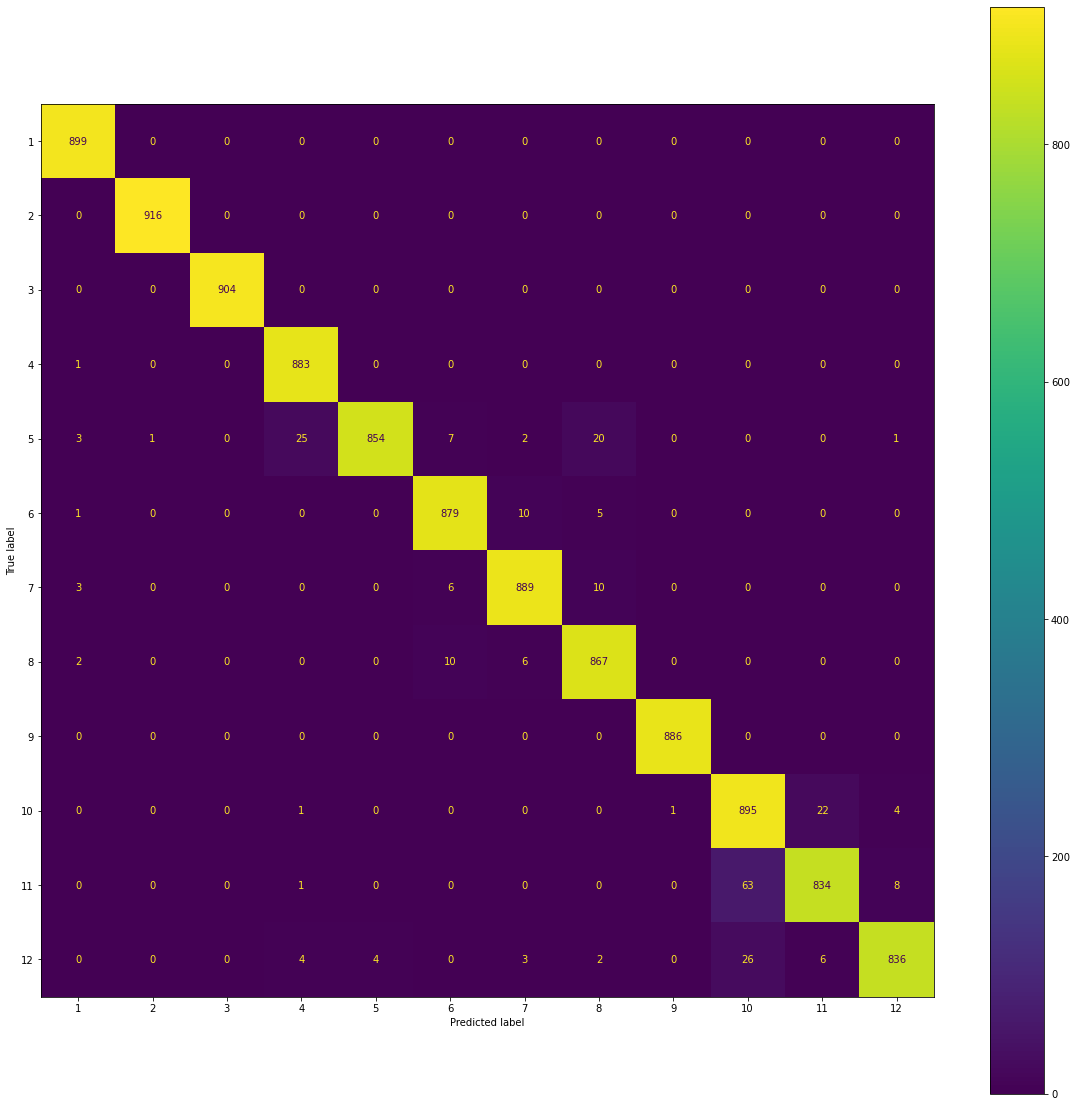

In [156]:
cmp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_test_k)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

In [160]:
print(metrics.classification_report(y_test, pred_test_k))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       899
           2       1.00      1.00      1.00       916
           3       1.00      1.00      1.00       904
           4       0.97      1.00      0.98       884
           5       1.00      0.94      0.96       913
           6       0.97      0.98      0.98       895
           7       0.98      0.98      0.98       908
           8       0.96      0.98      0.97       885
           9       1.00      1.00      1.00       886
          10       0.91      0.97      0.94       923
          11       0.97      0.92      0.94       906
          12       0.98      0.95      0.97       881

    accuracy                           0.98     10800
   macro avg       0.98      0.98      0.98     10800
weighted avg       0.98      0.98      0.98     10800



## Random forest model
Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.

In [175]:
# we can see the accuracy of the model is 99% here which is pretty high.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_predrfc = rfc.predict(X_test)
print(metrics.classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       444
           2       1.00      1.00      1.00       432
           3       1.00      1.00      1.00       438
           4       0.98      1.00      0.99       441
           5       0.98      0.98      0.98       465
           6       0.98      0.98      0.98       446
           7       0.99      1.00      0.99       467
           8       0.99      0.98      0.98       442
           9       1.00      1.00      1.00       460
          10       0.97      0.95      0.96       479
          11       0.95      0.96      0.96       426
          12       0.99      0.98      0.98       460

    accuracy                           0.99      5400
   macro avg       0.99      0.99      0.99      5400
weighted avg       0.99      0.99      0.99      5400



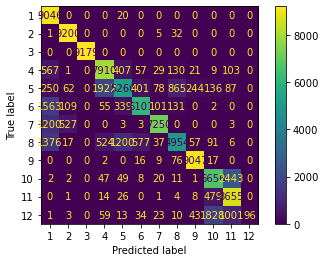

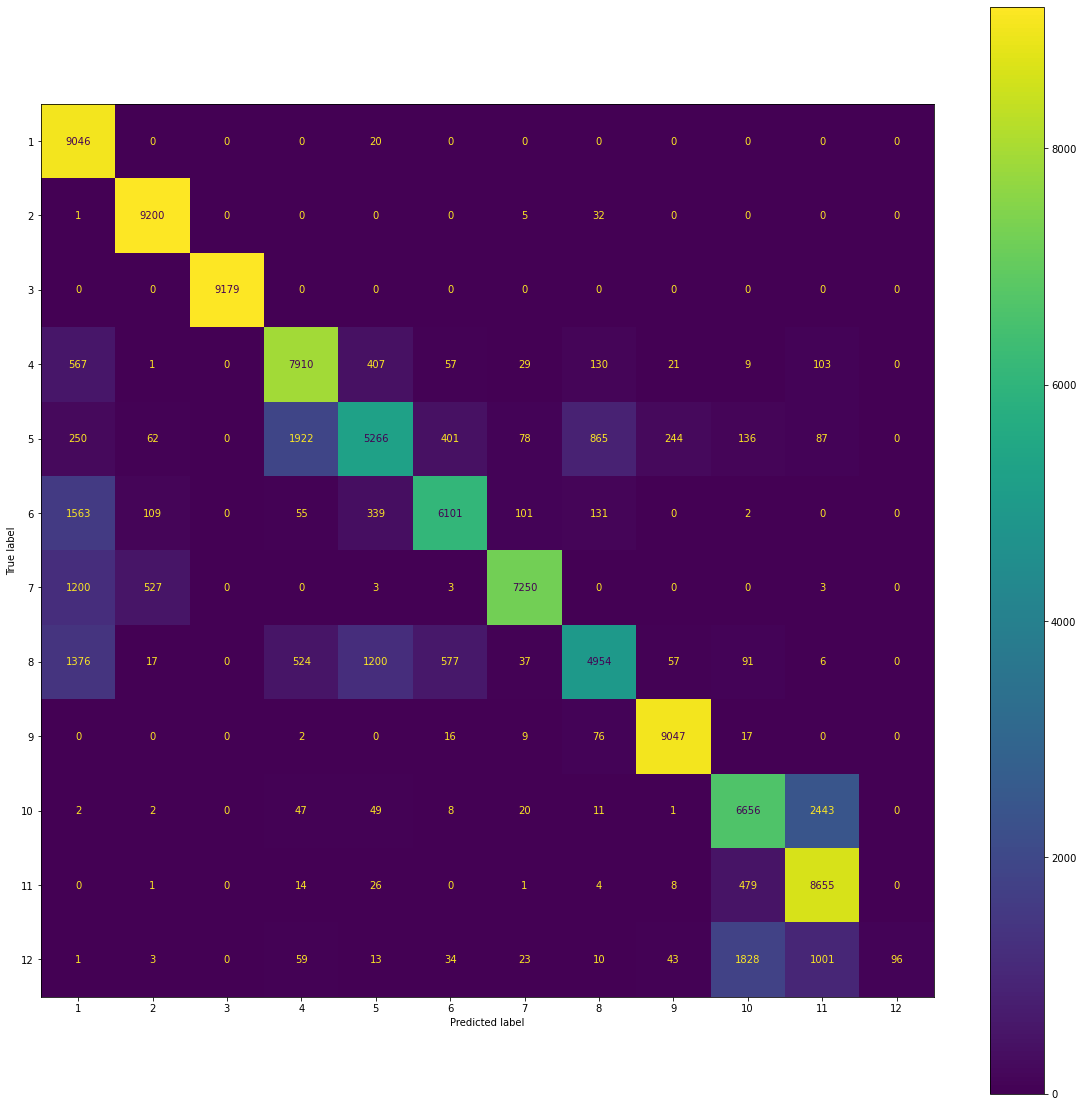

In [133]:
cmp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predrfc)
fig, ax = plt.subplots(figsize=(20,20))
cmp.plot(ax=ax)

Using the training data perform hyper-parameter tuning with f1-score.

Apply GridSearchCV to  get min_samples_split, max_depth, and n_estimators.

Apply best model from the outcomes.



In [176]:

from sklearn.model_selection import GridSearchCV


grid_param = {
    'max_depth' : [5,10,15,20],
    'min_samples_split' : [5,10,15,20],
    'n_estimators' : [10,50,100,150]
}

gs1= GridSearchCV(estimator=rfc,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)


gs1.fit(X_train, y_train)


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classifi

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='f1')

In [177]:
gs1.best_estimator_
best_estimator = gs1.best_estimator_
pred1 = best_estimator.predict(X_val)

In [180]:
print(metrics.classification_report(y_val, pred1))

              precision    recall  f1-score   support

           1       0.61      1.00      0.76       455
           2       0.91      0.91      0.91       484
           3       1.00      1.00      1.00       466
           4       0.58      0.71      0.64       443
           5       0.66      0.36      0.47       448
           6       0.73      0.74      0.73       449
           7       0.94      0.75      0.83       441
           8       0.62      0.54      0.58       443
           9       0.88      0.94      0.91       426
          10       0.67      0.52      0.58       444
          11       0.69      0.86      0.77       480
          12       0.76      0.59      0.66       421

    accuracy                           0.75      5400
   macro avg       0.75      0.74      0.74      5400
weighted avg       0.75      0.75      0.74      5400



Here we can see the most important features are acs_zaxis, acs_xaxis, al_as_yaxis,gr_l_as_yaxis

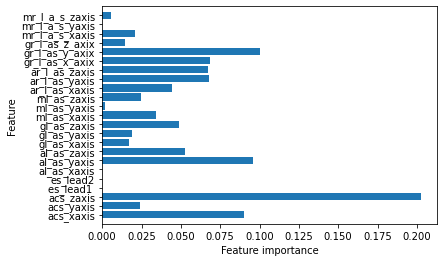

In [179]:
#Create a chart showing the feature importances based on the best model obtained.
def plot_feature_importances(model, rfc):
    n_features = rfc.shape[1]
    df_colnames= rfc.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, rfc=x)

# Adaboost model

In [188]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
#Fit the model
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [189]:
#Make predictions
y_predabc = abc.predict(X_test)


In [190]:
print(metrics.classification_report(y_test,y_predabc))

              precision    recall  f1-score   support

           1       0.23      1.00      0.37       444
           2       0.10      0.12      0.11       432
           3       0.94      0.16      0.28       438
           4       0.15      0.00      0.01       441
           5       0.00      0.00      0.00       465
           6       0.61      0.06      0.11       446
           7       0.41      0.58      0.48       467
           8       0.31      0.21      0.25       442
           9       0.74      0.25      0.38       460
          10       0.30      0.22      0.26       479
          11       0.24      0.12      0.15       426
          12       0.23      0.55      0.32       460

    accuracy                           0.28      5400
   macro avg       0.35      0.27      0.23      5400
weighted avg       0.35      0.28      0.23      5400



Using the training data perform hyper-parameter tuning with f1-score.

Apply GridSearchCV to get learning_rate, n_estimators.

Apply best model from the outcomes.

In [191]:
from sklearn.model_selection import GridSearchCV


grid_param = {
   'learning_rate' : [.2,.4,.6,.8,1.0],
    'n_estimators' : [10,50,100,150]
}

gs2= GridSearchCV(estimator=abc,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)


gs2.fit(X_train, y_train)

/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classifi

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='f1')

In [193]:
gs2.best_estimator_
best_estimator2 = gs2.best_estimator_
pred2 = best_estimator2.predict(X_val)
print(metrics.classification_report(y_val, pred2))

              precision    recall  f1-score   support

           1       0.65      0.98      0.78       455
           2       0.54      0.27      0.36       484
           3       0.00      0.00      0.00       466
           4       0.57      0.40      0.47       443
           5       0.21      0.26      0.23       448
           6       0.56      0.76      0.64       449
           7       0.60      0.79      0.68       441
           8       0.34      0.56      0.42       443
           9       0.99      0.58      0.73       426
          10       0.39      0.22      0.28       444
          11       0.50      0.21      0.30       480
          12       0.24      0.56      0.33       421

    accuracy                           0.46      5400
   macro avg       0.47      0.46      0.44      5400
weighted avg       0.46      0.46      0.43      5400



/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#So here we can see Random Forest Model perform best for our dataset